<a href="https://colab.research.google.com/github/fahernkhan/Klasifikasi-Gambar/blob/main/model_untuk_mengklasifikasikan_dataset_yang_sangat_variatif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mengunduh dataset

In [3]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2023-04-22 17:12:55--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2023-04-22 17:12:55--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M  97.6MB/s    in 

melakukan ekstraksi terhadap dataset

In [4]:
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

menggunakan fungsi listdir dari kelas os untuk melihat direktori yang terdapat pada dataset

In [5]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Rook', 'Pawn', 'Queen', 'King', 'Knight', 'Bishop']

In [6]:
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


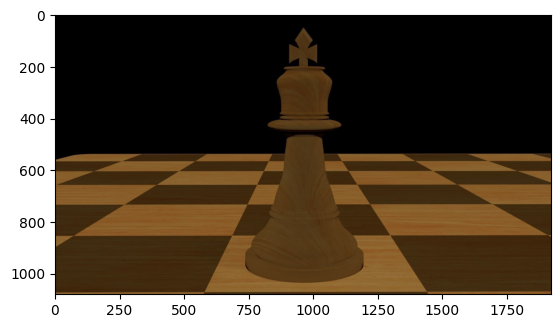

In [7]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

impor ImageDataGenerator dan aplikasikan augmentasi gambar pada dataset

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
 
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

memberi tahu ImageDataGenerator mana data untuk training dan mana data untuk testing dengan menambahkan parameter subset dengan nilai training atau validation

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


membuat arsitektur dari model kita. Untuk model ini kita menggunakan 3 lapis convolution dan 2 hidden layer dengan 512 dan 256 buah unit perseptron

In [10]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

menentukan optimizer dan loss yang akan digunakan model

In [11]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

panggil fungsi fit untuk melatih model kita

In [12]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 24s - loss: 1.9119 - accuracy: 0.1824 - val_loss: 1.7876 - val_accuracy: 0.1923 - 24s/epoch - 385ms/step
Epoch 2/50
63/63 - 12s - loss: 1.7844 - accuracy: 0.1924 - val_loss: 1.7829 - val_accuracy: 0.1923 - 12s/epoch - 189ms/step
Epoch 3/50
63/63 - 10s - loss: 1.7824 - accuracy: 0.1784 - val_loss: 1.7811 - val_accuracy: 0.2115 - 10s/epoch - 157ms/step
Epoch 4/50
63/63 - 10s - loss: 1.7786 - accuracy: 0.1804 - val_loss: 1.7604 - val_accuracy: 0.2885 - 10s/epoch - 160ms/step
Epoch 5/50
63/63 - 10s - loss: 1.7370 - accuracy: 0.2365 - val_loss: 1.7732 - val_accuracy: 0.3077 - 10s/epoch - 159ms/step
Epoch 6/50
63/63 - 10s - loss: 1.7579 - accuracy: 0.2184 - val_loss: 1.7621 - val_accuracy: 0.2692 - 10s/epoch - 157ms/step
Epoch 7/50
63/63 - 9s - loss: 1.7064 - accuracy: 0.2745 - val_loss: 1.7592 - val_accuracy: 0.3077 - 9s/epoch - 143ms/step
Epoch 8/50
63/63 - 10s - loss: 1.7089 - accuracy: 0.2485 - val_loss: 1.7492 - val_accuracy: 0.2692 - 10s/epoch - 158ms/step
Epoch 9/50

membuat plot akurasi dari model

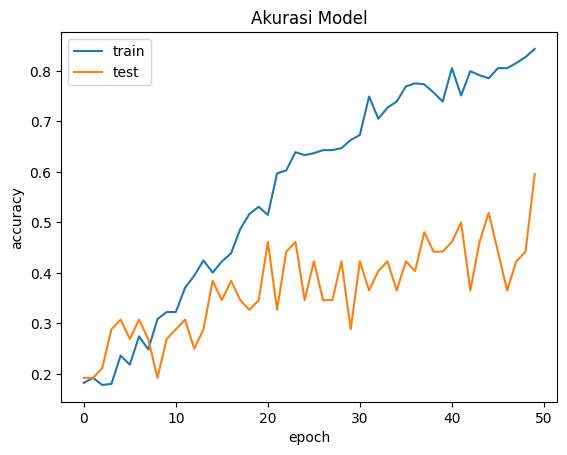

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

membuat plot loss

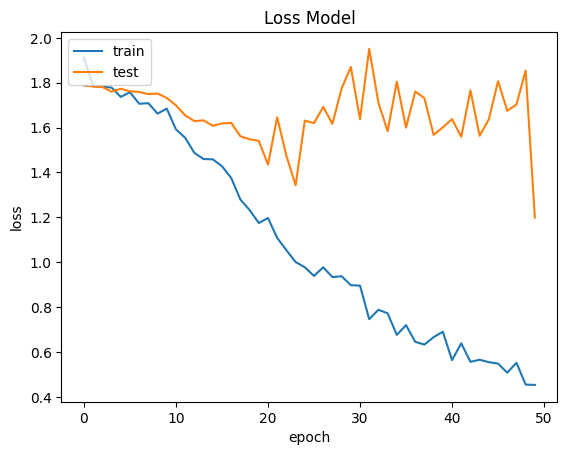

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Meningkatkan akurasi

In [15]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

Bagi dataset menjadi data training dan data validasi

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


mulai mengimplementasikan transfer learning. Untuk model yang kita pilih sebagai model dasar transfer learning adalah ResNet152V2

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model.layers[0].trainable = False

234545216/234545216 [==============================] - 2s 0us/step


menentukan optimizer, loss, serta metrik yang ingin digunakan pada model

In [18]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

melakukan pelatihan model

In [19]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 25s - loss: 6.4679 - accuracy: 0.4329 - val_loss: 1.5415 - val_accuracy: 0.6923 - 25s/epoch - 396ms/step
Epoch 2/50
63/63 - 11s - loss: 1.4659 - accuracy: 0.6994 - val_loss: 1.3284 - val_accuracy: 0.6538 - 11s/epoch - 171ms/step
Epoch 3/50
63/63 - 12s - loss: 1.1564 - accuracy: 0.7315 - val_loss: 0.9242 - val_accuracy: 0.7692 - 12s/epoch - 185ms/step
Epoch 4/50
63/63 - 11s - loss: 0.6321 - accuracy: 0.8236 - val_loss: 1.2546 - val_accuracy: 0.6346 - 11s/epoch - 171ms/step
Epoch 5/50
63/63 - 11s - loss: 0.8245 - accuracy: 0.8096 - val_loss: 0.5667 - val_accuracy: 0.7308 - 11s/epoch - 171ms/step
Epoch 6/50
63/63 - 10s - loss: 0.6808 - accuracy: 0.8277 - val_loss: 0.7701 - val_accuracy: 0.7885 - 10s/epoch - 158ms/step
Epoch 7/50
63/63 - 11s - loss: 0.5642 - accuracy: 0.8577 - val_loss: 0.7187 - val_accuracy: 0.7308 - 11s/epoch - 169ms/step
Epoch 8/50
63/63 - 11s - loss: 0.4321 - accuracy: 0.8697 - val_loss: 1.3080 - val_accuracy: 0.7308 - 11s/epoch - 170ms/step
Epoch 9/

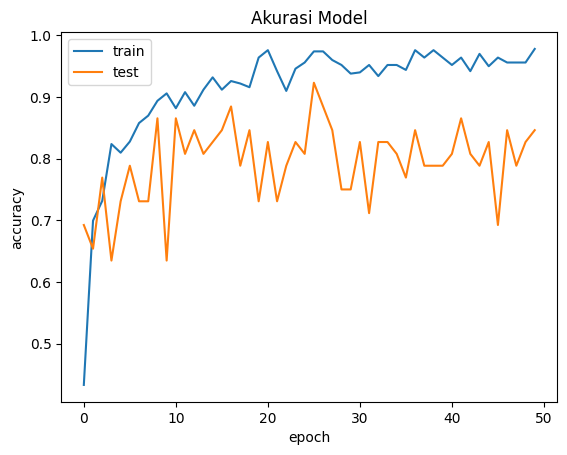

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

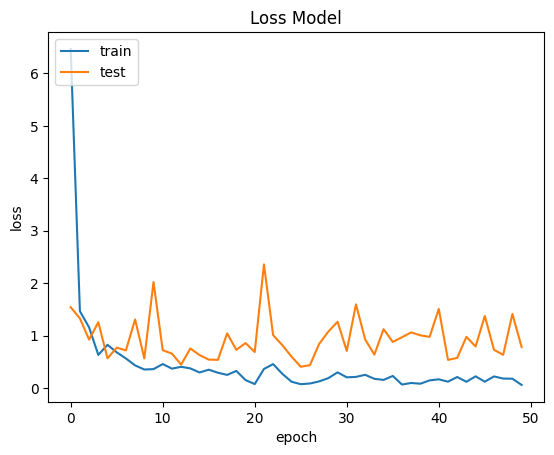

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()